## 👀 Bonus Part 3: Statistical Analysis 👀
This is the third bonus part of my capstone project. In this notebook, I'll discover more in-depth insights of autoscout data. Descriptive statistics are used to identify hidden patterns in the data, while inferential statistics are intended to extract inferences or hypotheses from a sample of large data. This type of statistical analysis is useful for making predictions about the population based on random samples of data.



Python replaces a complex mathematical expression with the functions that are present in its libraries. It is fast and provides accurate knowledge about data which can be used to process further for predictions or classifications like problems. Statistical analysis is important to good decisions on data. Statistical analysis of data helps us to access effective data only with good efficiency. It helps us to decide an optimal path for data accessing and processing.

**Descriptive Statistics:**

Descriptive statistics are used to identifying hidden patterns in the data. It just describes the data through statistics. It doesn’t make any predictions about the data. Several methods are used to analyze descriptive statistics of data such as mean, median, mode, variance, and standard deviation. Descriptive statistics frequently use the following statistical measures to describe groups: 
 - Central tendency : Use the mean or the median to locate the center of the dataset. This measure tells you where most values fall.
 - Dispersion: How far out from the center do the data extend? You can use the range or standard deviation to measure the dispersion. A low dispersion indicates that the values cluster more tightly around the center. Higher dispersion signifies that data points fall further away from the center. We can also graph the frequency distribution.
 - Skewness: The measure tells you whether the distribution of values is symmetric or skewed.

**Inferential Statistics:**

This type of statistical analysis is intended to extract inferences or hypotheses from a sample of large data. Prediction about the population is carried out from random samples of data. The prediction of the dependent variable based on the independent variable is carried out in inferential statistics. 

References
<br>
**[Difference between Descriptive and Inferential Statistics](https://statisticsbyjim.com/basics/descriptive-inferential-statistics/)**<br>
**[Introduction to Statistical Analysis in Python](https://www.educba.com/statistical-analysis-in-python/)**

<img src=https://i.ibb.co/ZMyccvG/statistical-tests.png width="500" height="250">

**[Measure the correlation between numerical and categorical variables and the correlation between two categorical variables in Python: Chi-Square and ANOVA](http://www.sefidian.com/2021/07/02/measure-the-correlation-between-numerical-and-categorical-variables-and-the-correlation-between-two-categorical-variables-in-python-chi-square-and-anova/)**<br>
**[Inferential Statistics: Data Analysis](https://towardsdatascience.com/inferential-statistics-data-analysis-e59adc75c6eb)**<br>
**[Statistical Inference in Python using Pandas, NumPy](https://towardsdatascience.com/statistical-inference-in-pyhton-using-pandas-numpy-part-i-c2ac0320dffe)**

<img src=https://i.ibb.co/mJCKMTw/rejection-area.png width="500" height="250">

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize

import requests
import geopy
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df = pd.read_csv("C:/Users/ihsankoo/Desktop/Data Preprocessing/use-this-for-bonus-parts")
df0 =df.copy()

In [5]:
df

,make_model,make,model,price,body_type,type,warranty,mileage,gearbox,fuel_type,...,non_smoker_vehicle,upholstery,previous_owner,energy_efficiency_class,power_kW,power_hp,fuel_consumption_avg,age,country,multimedia
0,Mercedes-Benz A 160,Mercedes-Benz,A 160,16950.000,Compact,Used,Available,120200.000,Manual,Diesel,...,No,Cloth,2.000,efficient,75.000,102.000,3.800,6.000,Spain,No
1,Mercedes-Benz EQE 350,Mercedes-Benz,EQE 350,80900.000,Compact,Pre-registered,Available,5000.000,Automatic,Electric,...,No,Part/Full Leather,0.000,efficient,215.000,292.000,5.300,0.000,Spain,Yes
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,69900.000,Compact,Used,Available,18900.000,Automatic,Benzine,...,No,Part/Full Leather,2.000,unefficient,310.000,421.000,8.400,2.000,Spain,No
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,A 35 AMG,46990.000,Compact,Used,Available,18995.000,Automatic,Benzine,...,No,Part/Full Leather,2.000,unefficient,225.000,306.000,7.300,2.000,Mexico,No
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,16800.000,Compact,Used,Available,197000.000,Automatic,Diesel,...,No,Part/Full Leather,2.000,unefficient,100.000,136.000,4.900,7.000,Spain,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24555,Volvo S90,Volvo,S90,37600.000,Sedan,Used,Available,40345.000,Automatic,Electric,...,No,Part/Full Leather,2.000,efficient,288.000,392.000,2.000,3.000,Spain,No
24556,Volvo S40,Volvo,S40,5499.000,Sedan,Used,Available,145000.000,Automatic,Benzine,...,No,Cloth,3.000,efficient,125.000,170.000,9.100,18.000,Netherlands,No
24557,Volvo C30,Volvo,C30,7300.000,Sedan,Used,No Warranty,96000.000,Manual,Diesel,...,No,Cloth,1.000,unefficient,84.000,114.000,3.800,11.000,Belgium,No
24558,Volvo S90,Volvo,S90,29900.000,Sedan,Used,Available,94343.000,Automatic,Benzine,...,No,Part/Full Leather,1.000,efficient,187.000,254.000,6.500,5.000,Netherlands,Yes


In [6]:
df.select_dtypes(exclude=["number", "bool_"]).head(3)

,make_model,make,model,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,full_service_history,non_smoker_vehicle,upholstery,energy_efficiency_class,country,multimedia
0,Mercedes-Benz A 160,Mercedes-Benz,A 160,Compact,Used,Available,Manual,Diesel,Dealer,Front,No,No,Cloth,efficient,Spain,No
1,Mercedes-Benz EQE 350,Mercedes-Benz,EQE 350,Compact,Pre-registered,Available,Automatic,Electric,Dealer,4WD,No,No,Part/Full Leather,efficient,Spain,Yes
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,Compact,Used,Available,Automatic,Benzine,Dealer,4WD,No,No,Part/Full Leather,unefficient,Spain,No


As seen above, there are many categorical features in the dataset such as ``"make_model"``, ``"make"``, ``"body_type"``, ``"type"``, ``"warranty"``, ``"gearbox"``, ``"fuel_type"``, ``"seller"``, etc. I will be using some of these features and check whether one feature effect other features using several tests i.e ``Z-Test``, ``correlation test``, ``ANOVA test``, and ``Chi-square test``.

## Let's start with ANOVA:

ANOVA stands for Analysis Of Variance. Actually, this test measures if there are any significant differences between the means of the values of the numeric variable for each categorical value. This is something that you can visualize using a box plot as well.

I'll measure if there is any correlation between fuel types and car prices. Here **``fuel_type``** is a categorical predictor and **``price``** is the numeric target/label variable.

In [7]:
# f_oneway() function takes the group data as input and returns F-statistic and P-value
from scipy.stats import f_oneway

print("Null Hypothesis (H0): There is NO correlation between the fuel type of a car and its price.")
print("Alternative Hypothesis (H1): There is a correlation between the fuel type of a car and its price.")
print("*"*100)
 
# Finds out the price for each fuel_type as a list
CategoryGroupLists = df.groupby('fuel_type')['price'].apply(list)
 
# Performing the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)

print('F-Value for Anova is: ', AnovaResults[0], '\nP-Value for Anova is: ', AnovaResults[1])
print("*"*45)

# Defining significance level
alpha = 0.05

if AnovaResults[1] <= alpha:
    print(f"Null hypothesis is rejected in favor of alternative hypothesis.\n\nCONCLUSION:\nThere is a statistically sufficient evidence to support the claim that fuel type of a car is a predictor \nof its price.  F={AnovaResults[0]}, p-value={AnovaResults[1]}")
else:
    print(f"Null Hypothesis is failed to reject.\n\nCONCLUSION:\nThere is NO statistically sufficient evidence to support the claim that fuel type of a car is a predictor \nof its price. F={AnovaResults[0]}, p-value={AnovaResults[1]}")     

Null Hypothesis (H0): There is NO correlation between the fuel type of a car and its price.
Alternative Hypothesis (H1): There is a correlation between the fuel type of a car and its price.
****************************************************************************************************
F-Value for Anova is:  157.22522505919187 
P-Value for Anova is:  6.077874656380365e-101
*********************************************
Null hypothesis is rejected in favor of alternative hypothesis.

CONCLUSION:
There is a statistically sufficient evidence to support the claim that fuel type of a car is a predictor 
of its price.  F=157.22522505919187, p-value=6.077874656380365e-101


### Is there a statistically significant difference in prices of car makes?

In [8]:
df.make.unique()

array(['Mercedes-Benz', 'Opel', 'Renault', 'Peugeot', 'Fiat', 'SEAT',
       'Skoda', 'Dacia', 'Toyota', 'Nissan', 'Ford', 'Hyundai', 'Volvo'],
      dtype=object)

In [9]:
# 1st step: Creating the hypothesis
print("Null Hypothesis (H0): There is NO correlation between the make of a car and its price.")
print("Alternative Hypothesis (H1): There is a correlation between the make of a car and its price.")

Null Hypothesis (H0): There is NO correlation between the make of a car and its price.
Alternative Hypothesis (H1): There is a correlation between the make of a car and its price.


In [10]:
# 2nd step: Defining the significance level
alpha = 0.05

In [11]:
# 3rd step: Creating the ANOVA test
CategoryGroupLists = df.groupby('make')['price'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)

In [12]:
CategoryGroupLists

make
Dacia            [22985.0, 13900.0, 22985.0, 22985.0, 22985.0, ...
Fiat             [28550.0, 12900.0, 20700.0, 20380.0, 24990.0, ...
Ford             [14990.0, 14990.0, 10890.0, 17900.0, 10800.0, ...
Hyundai          [32400.0, 25985.0, 3500.0, 30990.0, 13500.0, 1...
Mercedes-Benz    [16950.0, 80900.0, 69900.0, 46990.0, 16800.0, ...
Nissan           [15250.0, 4490.0, 19400.0, 12750.0, 12900.0, 7...
Opel             [4980.0, 9999.0, 5980.0, 5480.0, 15749.0, 1590...
Peugeot          [19100.0, 28100.0, 3800.0, 1900.0, 34199.0, 15...
Renault          [25950.0, 12850.0, 11850.0, 39900.0, 3999.0, 1...
SEAT             [30990.0, 7990.0, 8990.0, 11990.0, 14990.0, 52...
Skoda            [38300.0, 16990.0, 18990.0, 12890.0, 9500.0, 1...
Toyota           [29900.0, 29900.0, 20900.0, 11790.0, 19900.0, ...
Volvo            [11590.0, 9900.0, 11350.0, 12990.0, 18990.0, 4...
Name: price, dtype: object

In [13]:
# 4th step: Interpreting the results
print('F-Value for Anova is: ', AnovaResults[0], '\nP-Value for Anova is: ', AnovaResults[1])
print("*"*45)

if AnovaResults[1] <= alpha:
    print(f"Null hypothesis is rejected in favor of alternative hypothesis.\n\nCONCLUSION:\nThere is a statistically sufficient evidence to support the claim that make of a car is a predictor \nof its price.  F={AnovaResults[0]}, p-value={AnovaResults[1]}")
else:
    print(f"Null Hypothesis is failed to reject.\n\nCONCLUSION:\nThere is NO statistically sufficient evidence to support the claim that make of a car is a predictor \nof its price. F={AnovaResults[0]}, p-value={AnovaResults[1]}")

F-Value for Anova is:  424.8641310988463 
P-Value for Anova is:  0.0
*********************************************
Null hypothesis is rejected in favor of alternative hypothesis.

CONCLUSION:
There is a statistically sufficient evidence to support the claim that make of a car is a predictor 
of its price.  F=424.8641310988463, p-value=0.0


## z-test & t-test

**``Z-test``** is the statistical test, used to analyze whether two population means are different or not when the variances are known and the sample size is large. This test statistic is assumed to have a normal distribution, and **standard deviation** must be **known** to perform an accurate z-test.

A z-statistic, or z-score, is a number representing the value’s relationship to the mean of a group of values, it is measured with population parameters such as population standard deviation and used to validate a hypothesis. For example, the null hypothesis is “sample mean is the same as the population mean”, and alternative hypothesis is “the sample mean  is not the same as the population mean”. Z-test is not prefered to be implemented when the sample size is less than 30.

In order to know how significant the difference between two groups are, **``T-test``** is used, basically it tells that difference (measured in means) between two separate groups could have occurred by chance. This test assumes to have a normal distribution while based on t-distribution, and **population parameters such as mean, or standard deviation** are **unknown**.

The ratio between the difference between two groups and the difference within the group is known as T-score. Greater is the t-score, more is the difference between groups, and smaller is the t-score, more similarities are there among groups. For example, a t-score value of 2 indicates that the groups are two times as different from each other as they are with each other.

**Key Differences between t-test and z-test can be drawn clearly on the following grounds:**
 - The t-test can be understood as a statistical test which is used to compare and analyse whether the means of the two population is different from one another or not when the standard deviation is not known. As against, Z-test is a parametric test, which is applied when the standard deviation is known, to determine, if the means of the two datasets differ from each other.
 - The t-test is based on Student’s t-distribution. On the contrary, z-test relies on the assumption that the distribution of sample means is normal. Both student’s t-distribution and normal distribution appear alike, as both are symmetrical and bell-shaped. However, they differ in the sense that in a t-distribution, there is less space in the centre and more in the tails.
 - One of the important conditions for adopting t-test is that population variance is unknown. Conversely, population variance should be known or assumed to be known in case of a z-test.
 - Z-test is used to when the sample size is large, i.e. n > 30, and t-test is appropriate when the size of the sample is small, in the sense that n < 30.

<img src=https://i.ibb.co/vhms6Jr/parametric-test.png width="500" height="250">

References 
<br>
**[What are the Differences Between Z-test and T-test?](https://www.analyticssteps.com/blogs/what-are-differences-between-z-test-and-t-test)**<br>
**[Difference Between T-test and Z-test](https://keydifferences.com/difference-between-t-test-and-z-test.html)**<br>
**[Statistics for Analytics and Data Science: Hypothesis Testing and Z-Test vs. T-Test](https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/)**<br>
**[What Is the Difference Between a T-Test and a Z-Test?](https://knowledgehound.com/data/what-is-the-difference-between-a-t-test-and-a-z-test/)**<br>
**[Z-test](https://www.geeksforgeeks.org/z-test/)**<br>
**[Feature Selection using Statistical Tests](https://www.analyticsvidhya.com/blog/2021/06/feature-selection-using-statistical-tests/)**

### Is there a statistically significant price difference between the Toyota and Nissan cars?

In [14]:
# Assumption 1: Normality
# Assumption 2: Homogeneity of Variance
# Assumption 3: Independence of Errors

In [15]:
Toyota = df[df.make == 'Toyota']
Nissan = df[df.make == 'Nissan']

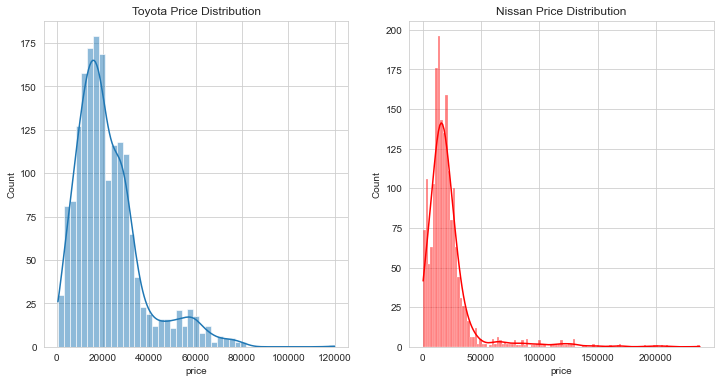

In [16]:
# Checking the distribution of the price variable

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) # set the figure size

sns.histplot(Toyota.price, kde=True, label='Toyota', ax=ax1) # add ax=ax1 to specify subplot
sns.histplot(Nissan.price, kde=True, color='red', ax=ax2) # add ax=ax2 to specify subplot

ax1.set_title('Toyota Price Distribution') # set subplot title
ax2.set_title('Nissan Price Distribution') # set subplot title

plt.show()

In [17]:
# 1st step: Creating the hypothesis
print("Null Hypothesis (H0): There is NO significant price difference between the Toyata and Nissan cars. (μ1 = μ2)")
print("Alternative Hypothesis (H1): There is a significant price difference between the Toyata and Nissan cars. (μ1 ≠ μ2)")

Null Hypothesis (H0): There is NO significant price difference between the Toyata and Nissan cars. (μ1 = μ2)
Alternative Hypothesis (H1): There is a significant price difference between the Toyata and Nissan cars. (μ1 ≠ μ2)


In [18]:
# 2nd step: Defining the significance level. We will use 0.05 as our significance level. 
alpha = 0.05

In [19]:
# 3rd step: Creating the z test

x1 = Toyota.price.mean()
print("x1 =",x1)

x2 = Nissan.price.mean()
print("x2 =",x2)

n1 = Toyota.shape[0]
print("n1 =",n1)

n2 = Nissan.shape[0]
print("n2 =",n2)

s1 = Toyota.price.std()
print("s1 =",s1)

s2 = Nissan.price.std()
print("s2 =",s2)

x1 = 22428.350170261067
x2 = 22019.660655737705
n1 = 1762
n2 = 1830
s1 = 14588.310667721564
s2 = 22964.40457494665


In [20]:
# 4th step: Calculating the z-score
z_score = (x1 - x2) / np.sqrt(s1**2/n1 + s2**2/n2)
print(f"z-score: {z_score:.4f}")

# 5th step: Calculating the p-value
p_value = stats.norm.sf(abs(z_score))*2
print(f"p-value: {p_value:.4f}")

# 6th step: Interpreting the results
if p_value < alpha:
    print(f"Null hypothesis is rejected in favor of alternative hypothesis.\n\nCONCLUSION:\nThere is a statistically sufficient evidence to support the claim that the price of a Toyota car is different \nfrom the price of a Nissan car.  z-score={z_score}, p-value={p_value}")
else:
    print(f"Null Hypothesis is failed to reject.\n\nCONCLUSION:\nThere is NO statistically sufficient evidence to support the claim that the price of a Toyota car is different \nfrom the price of a Nissan car. z-score={z_score}, p-value={p_value}")

z-score: 0.6391
p-value: 0.5228
Null Hypothesis is failed to reject.

CONCLUSION:
There is NO statistically sufficient evidence to support the claim that the price of a Toyota car is different 
from the price of a Nissan car. z-score=0.6390772258348556, p-value=0.5227726946026057


## Mann-Whitney U:

Aka Mann Whitney Wilcoxon Test or Wilcoxon Rank Sum Test.

Compares differences between two variables when the dependent variable is either ordinal or continuous & not normally distributed.
independent variable should consist of two categorical, independent groups.

### Is there a significant price difference between the cars with and without warranty?

In [25]:
df.warranty.value_counts(dropna=False)

No Warranty    13466
Available      11094
Name: warranty, dtype: int64

In [33]:
# 1st step: Creating the hypothesis
print("Null Hypothesis (H0): There is NO significant price difference between the cars with and without warranty.")
print("Alternative Hypothesis (H1): There is a significant price difference between the cars with and without warranty.")
print("*"*100)

# 2nd step: Defining the significance level
alpha = 0.05

# 3rd step: Creating the Mann-Whitney U test
mwu_results = stats.mannwhitneyu(x=df.warranty.map({"No Warranty":0, "Available":1}), y=df.price,
                                    alternative='two-sided')

# 4th step: Interpreting the results
if mwu_results[1] < alpha:
    print(f"Null hypothesis is rejected in favor of alternative hypothesis.\n\nCONCLUSION:\nThere is a statistically sufficient evidence to support the claim that the price of a car with warranty is different \nfrom the price of a car without warranty.  U={mwu_results[0]}, p-value={mwu_results[1]}")
else:
    print(f"Null Hypothesis is failed to reject.\n\nCONCLUSION:\nThere is NO statistically sufficient evidence to support the claim that the price of a car with warranty is different \nfrom the price of a car without warranty. U={mwu_results[0]}, p-value={mwu_results[1]}")

Null Hypothesis (H0): There is NO significant price difference between the cars with and without warranty.
Alternative Hypothesis (H1): There is a significant price difference between the cars with and without warranty.
****************************************************************************************************
Null hypothesis is rejected in favor of alternative hypothesis.

CONCLUSION:
There is a statistically sufficient evidence to support the claim that the price of a car with warranty is different 
from the price of a car without warranty.  U=0.0, p-value=0.0


### I'll make the same test with Point-biserial correlation:

 - It is used to measure the strength and direction of the association
 - Between continuous & categorical variable

In [35]:
# 1st step: Creating the hypothesis
print("Null Hypothesis (H0): There is NO association between the price of a car and its warranty.")
print("Alternative Hypothesis (H1): There is an association between the price of a car and its warranty.")
print("*"*100)

# 2nd step: Defining the significance level
alpha = 0.05

# 3rd step: Creating the point-biserial correlation
pb_results = stats.pointbiserialr(x=df.warranty.map({"No Warranty":0, "Available":1}), y=df.price)

# 4th step: Interpreting the results
if pb_results[1] < alpha:
    print(f"Null hypothesis is rejected in favor of alternative hypothesis.\n\nCONCLUSION:\nThere is a statistically sufficient evidence to support the claim that there is an association between the \nprice of a car and whether it has a warranty. r={pb_results[0]}, p-value={pb_results[1]}")
else:
    print(f"Null Hypothesis is failed to reject.\n\nCONCLUSION:\n\nThere is a statistically sufficient evidence to support the claim that there is an association between the \nprice of a car and whether it has a warranty. r={pb_results[0]}, p-value={pb_results[1]}")

Null Hypothesis (H0): There is NO association between the price of a car and its warranty.
Alternative Hypothesis (H1): There is an association between the price of a car and its warranty.
****************************************************************************************************
Null hypothesis is rejected in favor of alternative hypothesis.

CONCLUSION:
There is a statistically sufficient evidence to support the claim that there is an association between the 
price of a car and whether it has a warranty. r=-0.018577301562185344, p-value=0.003597335006913331


## The Chi-Square Test:

The chi-square test is a hypothesis test designed to test for a statistically significant relationship between nominal and ordinal variables organized in a bivariate table. In other words, it tells us whether two variables are independent of one another. so when the target variable and the predictors are categorical, then the strength of the relationship between them can be measured using a Chi-square test.

🔥 👉 **SPECIAL NOTE:** Even if my **target variable**, "price", is **NOT categorical**, I will test some of other categorical variables in my dataframe to practice Chi-Square Testing for courtesy.

<br>

References

**[A beginner’s guide to Chi-square test in python from scratch](https://analyticsindiamag.com/a-beginners-guide-to-chi-square-test-in-python-from-scratch/)**

**[Measure the correlation between numerical and categorical variables and the correlation between two categorical variables in Python: Chi-Square and ANOVA](http://www.sefidian.com/2021/07/02/measure-the-correlation-between-numerical-and-categorical-variables-and-the-correlation-between-two-categorical-variables-in-python-chi-square-and-anova/)**

### Is there statistically significant association between 'gearbox' and 'body_type'?

In [36]:
# 1st step: Creating the hypothesis
print("Null Hypothesis (H0): There is NO statistically significant association between gearbox and body type of a car.")
print("Alternative Hypothesis (H1): There is a statistically significant association between gearbox and body type of a car.")
print("*"*100)

# 2nd step: Defining the significance level
alpha = 0.05

# 3rd step: Creating the chi-square test
chi2_results = stats.chi2_contingency(pd.crosstab(df.gearbox, df.body_type))

# 4th step: Interpreting the results
if chi2_results[1] < alpha:
    print(f"Null hypothesis is rejected in favor of alternative hypothesis.\n\nCONCLUSION:\nThere is a statistically sufficient evidence to support the claim that there is an association between the \ngearbox and body type of a car. χ2={chi2_results[0]}, p-value={chi2_results[1]}")
else:
    print(f"Null Hypothesis is failed to reject.\n\nCONCLUSION:\nThere is NO statistically sufficient evidence to support the claim that there is an association between the \ngearbox and body type of a car. χ2={chi2_results[0]}, p-value={chi2_results[1]}")

Null Hypothesis (H0): There is NO statistically significant association between gearbox and body type of a car.
Alternative Hypothesis (H1): There is a statistically significant association between gearbox and body type of a car.
****************************************************************************************************
Null hypothesis is rejected in favor of alternative hypothesis.

CONCLUSION:
There is a statistically sufficient evidence to support the claim that there is an association between the 
gearbox and body type of a car. χ2=879.5042979629399, p-value=1.639261573467058e-182


### Is there statistically significant association between 'warranty' and 'type' of a car?

In [37]:
df.type.value_counts(dropna=False)

 Used               21550
 Demonstration       1310
 Pre-registered      1181
 Employees car        519
Name: type, dtype: int64

In [38]:
# 1st step: Creating the hypothesis
print("Null Hypothesis (H0): There is NO statistically significant association between the warranty of a car and its type.")
print("Alternative Hypothesis (H1): There is a statistically significant association between the warranty of a car and its type.")
print("*"*100)

# 2nd step: Defining the significance level
alpha = 0.05

# 3rd step: Creating the chi-square test
chi2_results = stats.chi2_contingency(pd.crosstab(df.warranty, df.type))

# 4th step: Interpreting the results
if chi2_results[1] < alpha:
    print(f"Null hypothesis is rejected in favor of alternative hypothesis.\n\nCONCLUSION:\nThere is a statistically sufficient evidence to support the claim that there is an association between the \nwarranty of a car and its type. χ2={chi2_results[0]}, p-value={chi2_results[1]}")
else:
    print(f"Null Hypothesis is failed to reject.\n\nCONCLUSION:\nThere is NO statistically sufficient evidence to support the claim that there is an association between the \nwarranty of a car and its type. χ2={chi2_results[0]}, p-value={chi2_results[1]}")

Null Hypothesis (H0): There is NO statistically significant association between the warranty of a car and its type.
Alternative Hypothesis (H1): There is a statistically significant association between the warranty of a car and its type.
****************************************************************************************************
Null hypothesis is rejected in favor of alternative hypothesis.

CONCLUSION:
There is a statistically sufficient evidence to support the claim that there is an association between the 
warranty of a car and its type. χ2=9.407092883715995, p-value=0.024340555803442993


## Pearson Correlation Coefficient:

It is used to measure the linear correlation between 2 variables. Its values lie between -1 and 1.

If the value of r is 0, it means there is no relationship between variables X and Y.

If the value of r is between 0 and 1, it means there is a positive relation between X and Y, and their strength increases from 0 to 1. Positive relation means if the value of X increases, the value of Y also increases.

If the value of r is between -1 and 0, it means there is a negative relation between X and Y, and their strength decreases from -1 to 0. Negative relation means if the value of X increases, the value of Y decreases.

In [39]:
df.select_dtypes(include="number").columns

Index(['price', 'mileage', 'engine_size', 'gears', 'co_emissions', 'cylinders',
       'num_comfort_convenience', 'num_safety_security', 'num_extras',
       'empty_weight', 'previous_owner', 'power_kW', 'power_hp',
       'fuel_consumption_avg', 'age'],
      dtype='object')

### Is there statistically significant association between 'price' and 'mileage'?

In [41]:
pearson = df[["price", "mileage"]].corr(method="pearson")
pearson

,price,mileage
price,1.000,-0.349
mileage,-0.349,1.000


The value -0.349 suggests that there is some **negative correlation** between the two features.

### Is there statistically significant association between 'price' and 'age'?

In [42]:
stats.pearsonr(x=df.price, y=df.age)

(-0.3058717706016929, 0.0)

The value -0.305... suggests that there is some **negative correlation** between the price of a car and its age.

# <mark>End of statistical analysis<mark>